# Tutorial 7.2: Diverse Dynamical Systems from Similar Circuit Architectures
### Neuroscience goal:
- learn how near-identical circuits can produce very different types of activity
- learn how highly simplified neural circuits cna nevertheless produce complex patterns of activity
### Computational goal:
- practice using matrices, arrays, to simulate coupled units
- understand the idea of using a single function to simulate multiple types of circuit by changing particular parameters

### Overview
for each question, simulate a two-unit or three-unit circuit, with connection matrices defines as:

$$
\underline{\underline{W}} = {\begin{pmatrix}
W_{11} & W_{12} \\
W_{21} & W_{22} \\
\end{pmatrix}}_{}
$$

or

$$
\underline{\underline{W}}= {\begin{pmatrix}
W_{11} & W_{12} & W_{13}\\
W_{21} & W_{22} & W_{23}\\
W_{31} & W_{32} & W_{33} \\
\end{pmatrix}}_{}
$$

respectively, where $W_{ji}$ is the connection strength from unit $j$ to unit $i$

each unit, $i$, responds to a total input current, $I_i$, given by:

$$
I_i = I_i^{(app)} + \sum_{j=1}^{N_{units}}W_{ji}r_j
$$

where $I_i^{(app)}$ is an external, applied current. each unit responds with a threshold-linear firing-rate curve, so that:

$$
\tau \frac{dr_i}{dt} = -r_i + I_i - \Theta_i
$$

with time constant $\tau$ = 10ms, and where $\Theta_i$ is the threshold for unit $i$

if the threshold is negative, it indicates the level of spontaneous activity in the unit in the absence of input current

to ensure rates are positive and do not exceed a maximum, include the following constraint conditions:

$
0 \le r_i \le r_{max}
$

where $r_{max}$ = 100hz

the values of connections strengths and threshold will vary across the nine circuits simulated

for each circuit, determine what sort of dynamical system is produced
- e.g., find number of distinct states within the circuit, or whether the system is chaotic, or possesses a heteroclinic sequence 
- use pulses of applied current or changes in initial conditions to aid in analysis


In [74]:
import numpy as np
import matplotlib.pyplot as plt

In [155]:
# constants
tau = 10e-3
r_max = 100

# time vector
dt = 0.1e-3
t = np.arange(0, 3, dt)

In [172]:
# define functions

# update ODE
def update_r(r, i_app, w, theta, tau):
    i_total = np.dot(w, r) + i_app
    return (-r + i_total - theta) / tau

def simulate_circuit(w, i_app, theta, tau, sigma=0, r_init=None):
    n_units = w.shape[0]
    r = np.zeros((n_units, len(t)))

    if r_init is not None:
        r[:, 0] = r_init

    noise = np.random.normal(0, sigma, (n_units, len(t)))

    for i in range(1, len(t)):
        drdt = update_r(r[:, i-1], i_app[:, i-1], w, theta, tau)
        r[:, i] = r[:, i-1] + drdt * dt + (noise[:, i] * np.sqrt(dt))

        r[:, i] = np.clip(r[:, i], 0, r_max)
    
    return r

In [156]:
def plot_dynamics(t, r):

    n_units = r.shape[0]

    if n_units == 2:
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))
        for i, rates in enumerate(r):
            ax[0].plot(t, rates, label=f'unit {i+1}')
        
        ax[0].set_xlabel('time (s)')
        ax[0].set_ylabel('firing rate (hz)')
        ax[0].legend()

        ax[1].plot(r[0], r[1])
        ax[1].set_xlabel('unit 1 (hz)')
        ax[1].set_ylabel('unit 2 (hz)')
        ax[1].set_title('phase space')
        plt.show()

    elif n_units == 3:
        fig = plt.figure(figsize=(10, 5))
        ax1 = fig.add_subplot(121)
        ax2 = fig.add_subplot(122, projection='3d')

        for i, rates in enumerate(r):
            ax1.plot(t, rates, label=f'unit {i+1}')
        
        ax1.set_xlabel('time (s)')
        ax1.set_ylabel('firing rate (hz)')
        ax1.legend()

        ax2.plot(r[0], r[1], r[2], linewidth=3)
        ax2.set_xlabel('unit 1 (hz)')
        ax2.set_ylabel('unit 2 (hz)')
        ax2.set_zlabel('unit 3 (hz)')
        ax2.set_title('3D phase space')

        ax2.xaxis.pane.fill = False
        ax2.yaxis.pane.fill = False
        ax2.zaxis.pane.fill = False

        plt.tight_layout()
        plt.show()

### define params per question


In [149]:
# q1
w1 = np.array([[0.6, 1],
               [-0.2, 0]])
theta1 = np.array([-5, -10])

# q2
w2 = np.array([[1.2, -0.3],
               [-0.2, 1.1]])
theta2 = np.array([10, 5])

# q3
w3 = np.array([[2.5, 2],
               [-3.0, -2]])
theta3 = np.array([-10, 0])

# q4
w4 = np.array([[0.8, -0.2],
               [-0.4, 0.6]])
theta4 = np.array([-10, -10])

# q5
w5 = np.array([[2, 1],
               [-1.5, 0]])
theta5 = np.array([0, 20])

# q6
w6 = np.array([[1.5, 0, 1],
               [0, 2, 1],
               [-2.5, -3, -1]])
theta6 = np.array([-10, -5, 5])

# q7
w7 = np.array([[2.2, -0.5, 0.9],
               [-0.7, 2, 1.2],
               [-1.6, -1.2, 0]])
theta7 = np.array([-18, -15, 0])

# q8
w8 = np.array([[2.05, -0.2, 1.2],
               [-0.05, 2.1, 0.5],
               [-1.6, -4, 0]])
theta8 = np.array([-10, -20, 10])

# q9
w9 = np.array([[0.98, -0.015, -0.01],
               [0, 0.99, -0.02],
               [-0.02, 0.005, 1.01]])
theta9 = np.array([-2, -1, -1])

### plotting 
#### vary baseline current

Simulating for q1
constant current = 0


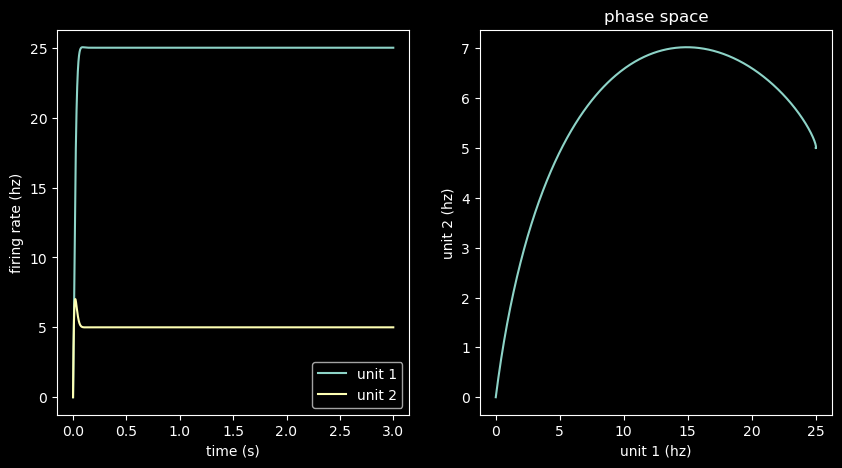

constant current = 10


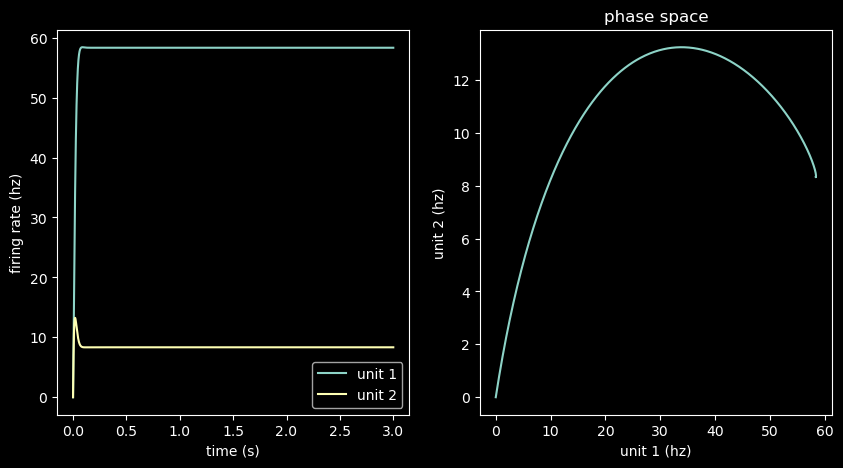

-----------------------------------------------------------
-----------------------------------------------------------
Simulating for q2
constant current = 0


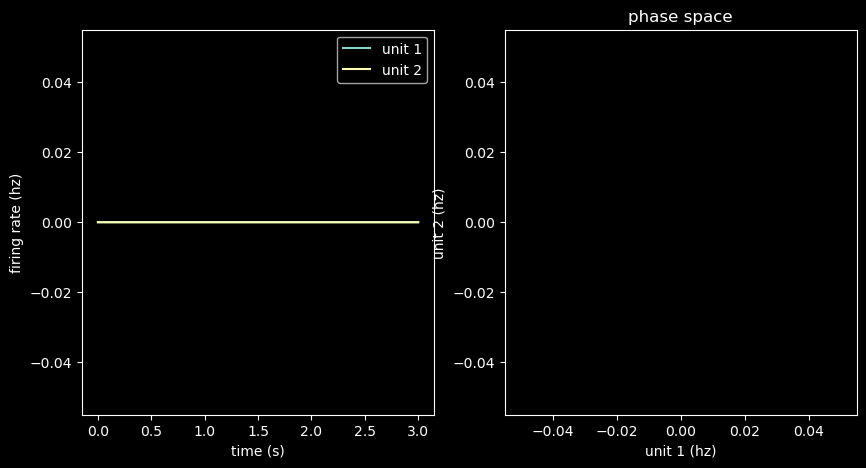

constant current = 10


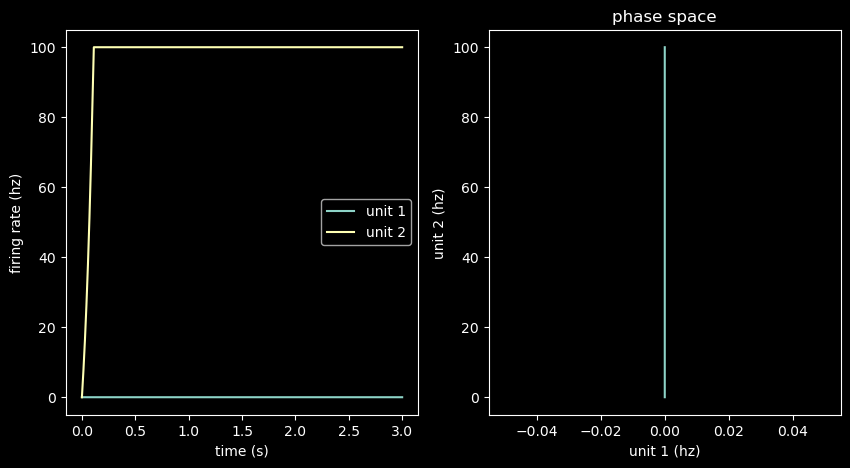

-----------------------------------------------------------
-----------------------------------------------------------
Simulating for q3
constant current = 0


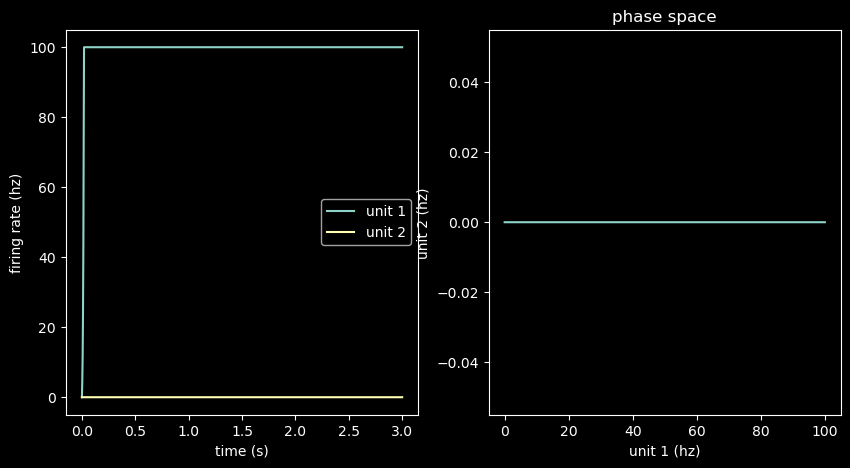

constant current = 10


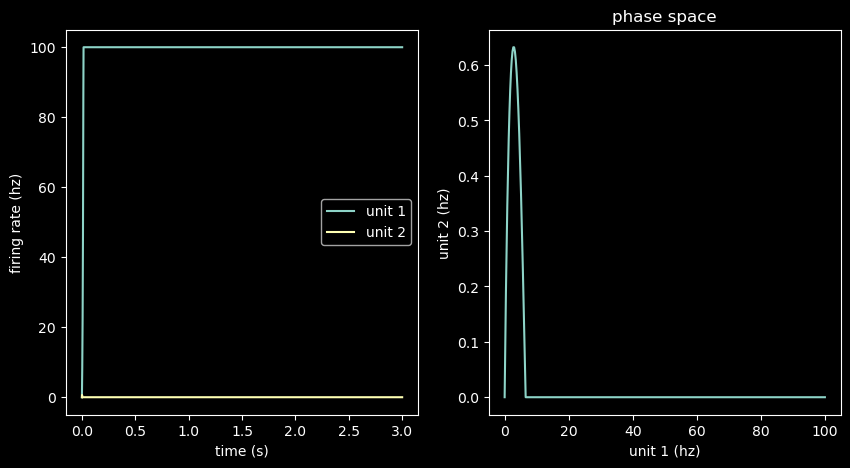

-----------------------------------------------------------
-----------------------------------------------------------
Simulating for q4
constant current = 0


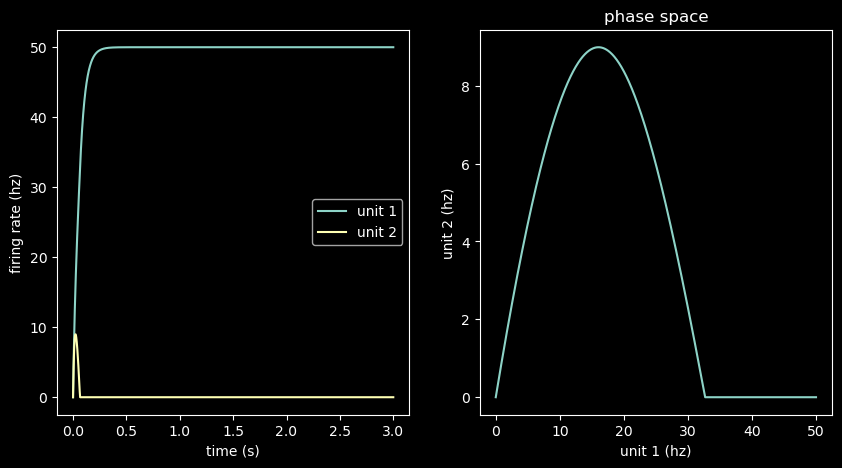

constant current = 10


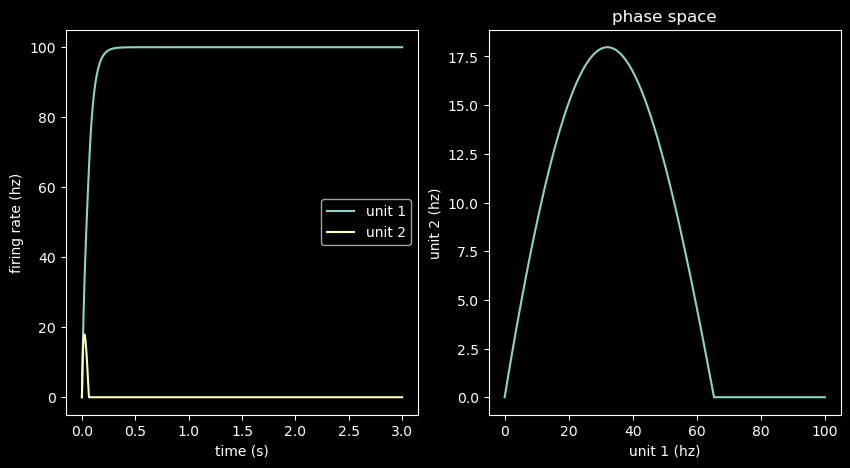

-----------------------------------------------------------
-----------------------------------------------------------
Simulating for q5
constant current = 0


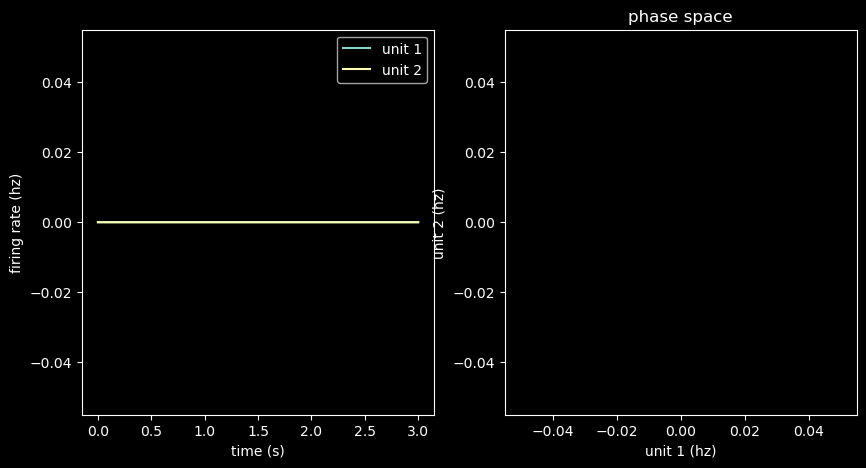

constant current = 10


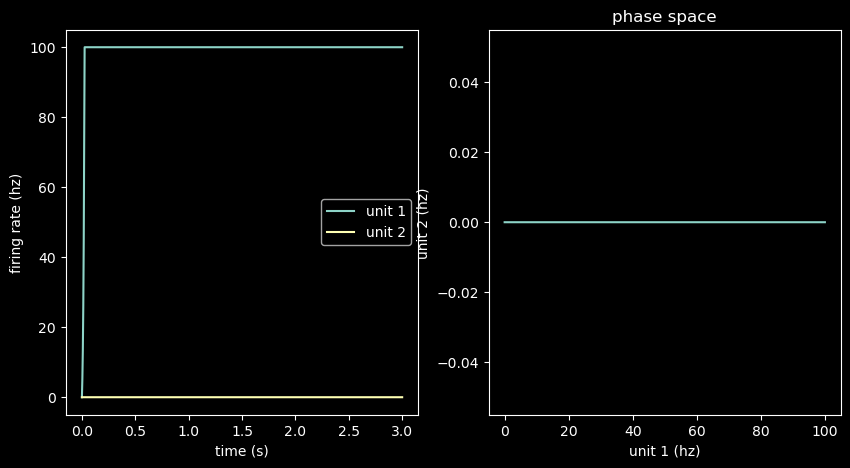

-----------------------------------------------------------
-----------------------------------------------------------
Simulating for q6
constant current = 0


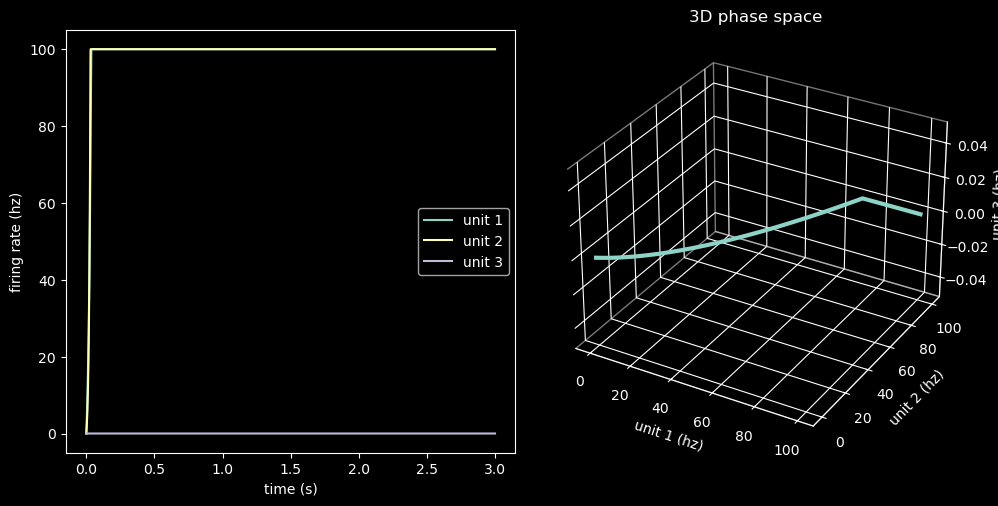

constant current = 10


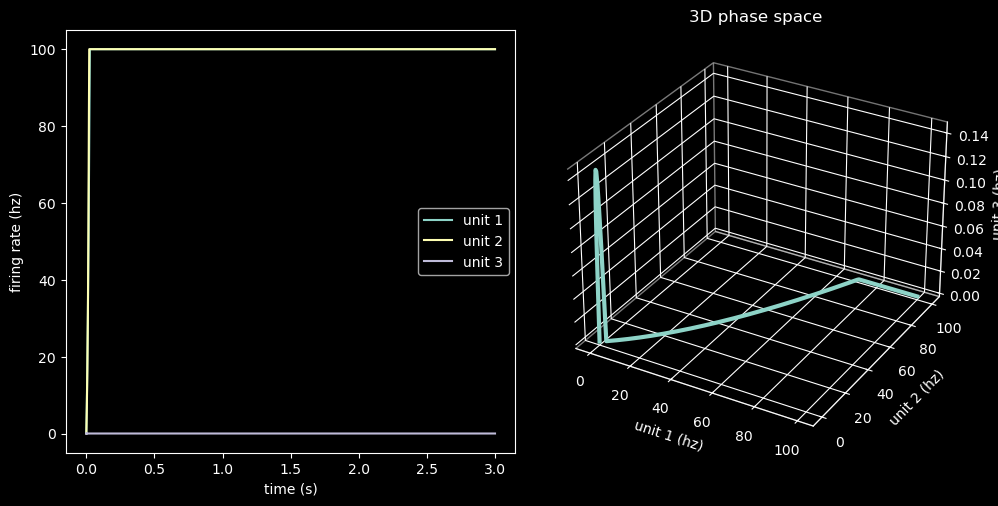

-----------------------------------------------------------
-----------------------------------------------------------
Simulating for q7
constant current = 0


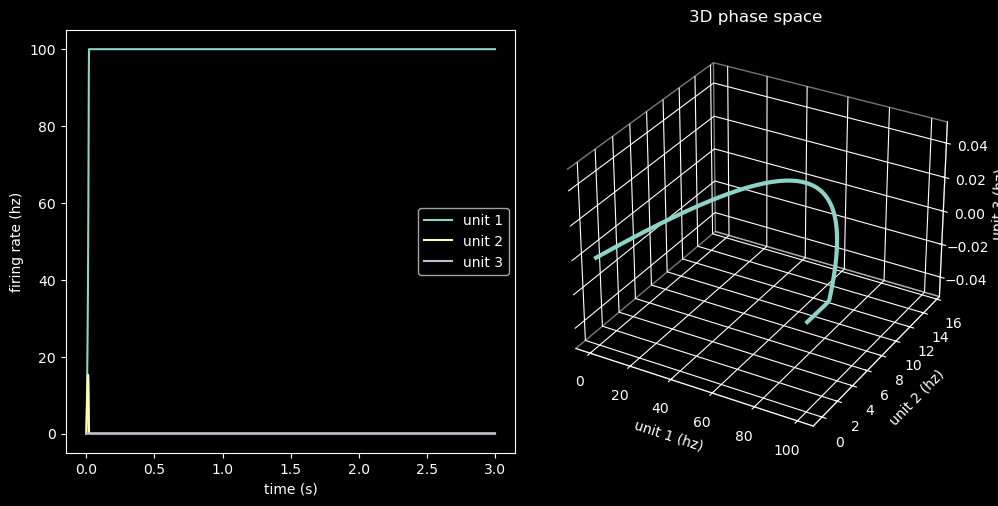

constant current = 10


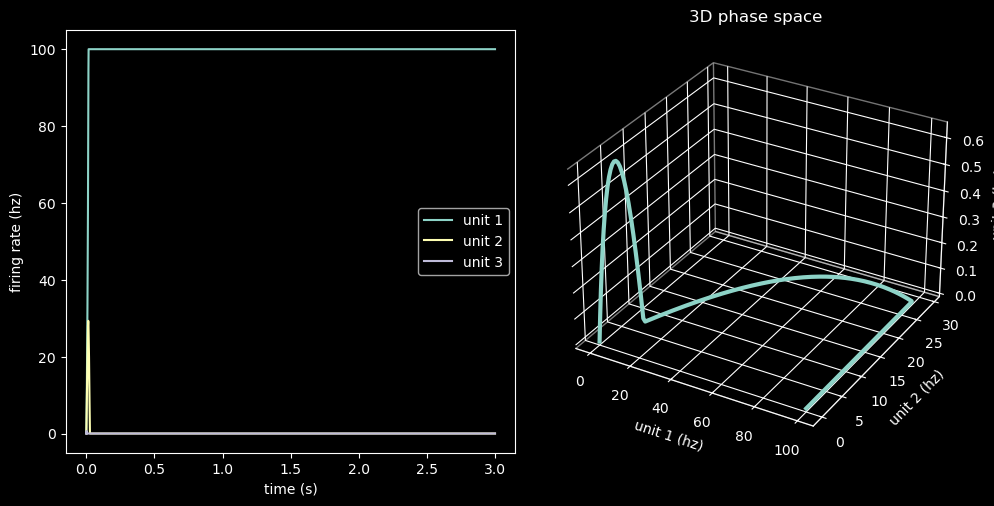

-----------------------------------------------------------
-----------------------------------------------------------
Simulating for q8
constant current = 0


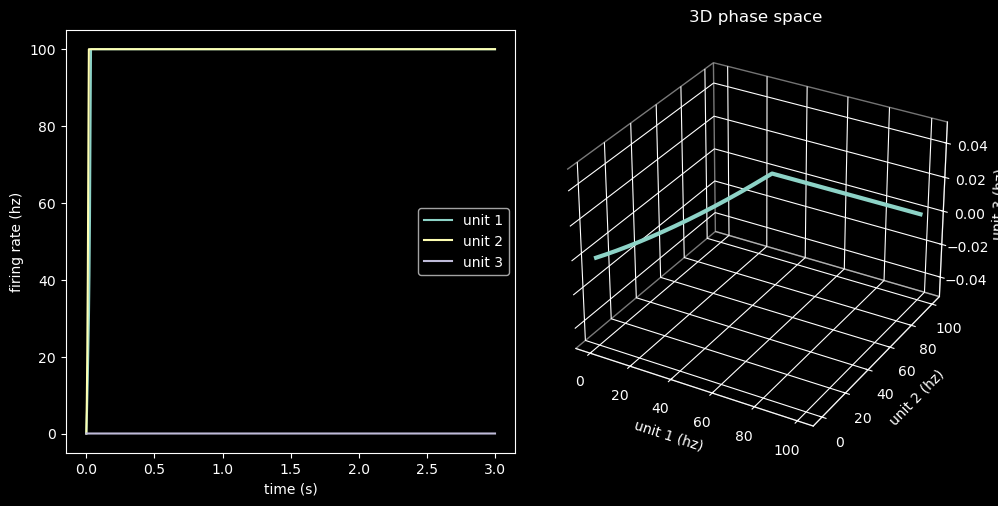

constant current = 10


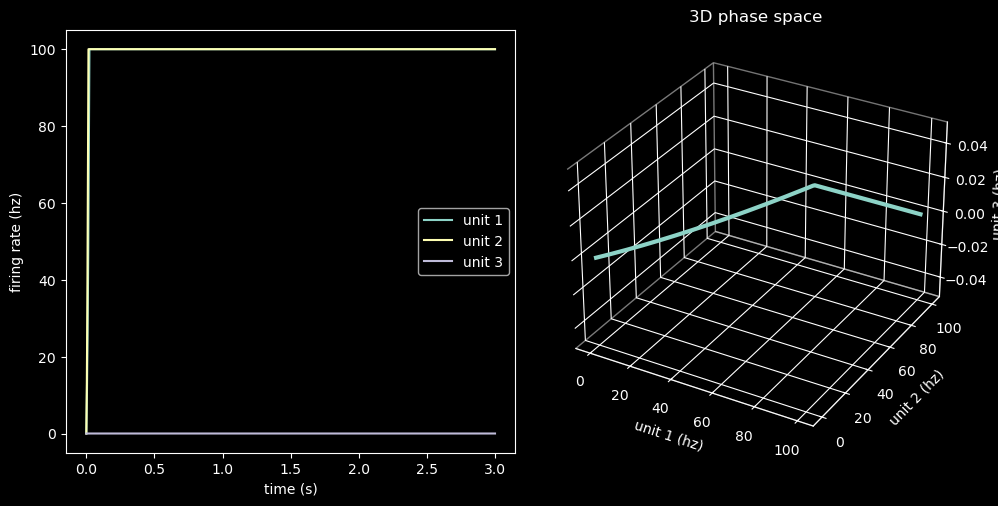

-----------------------------------------------------------
-----------------------------------------------------------
Simulating for q9
constant current = 0


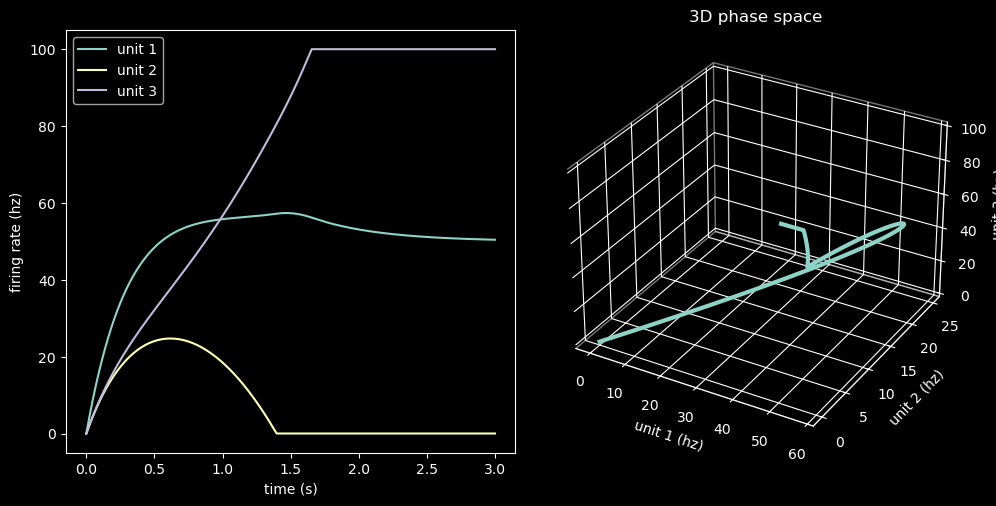

constant current = 10


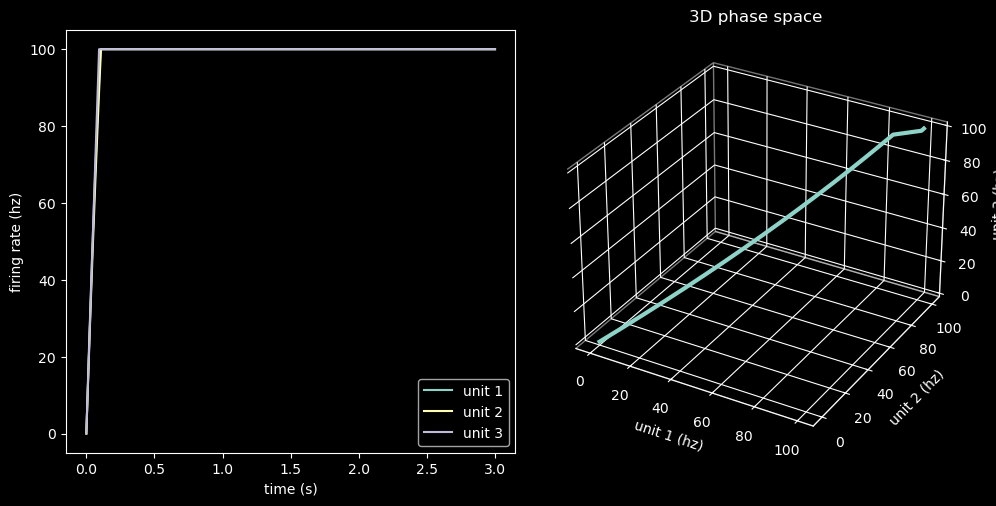

-----------------------------------------------------------
-----------------------------------------------------------


In [171]:
parameter_sets = [
    {"w": w1, "theta": theta1, "question": "q1"},
    {"w": w2, "theta": theta2, "question": "q2"},
    {"w": w3, "theta": theta3, "question": "q3"},
    {"w": w4, "theta": theta4, "question": "q4"},
    {"w": w5, "theta": theta5, "question": "q5"},
    {"w": w6, "theta": theta6, "question": "q6"},
    {"w": w7, "theta": theta7, "question": "q7"},
    {"w": w8, "theta": theta8, "question": "q8"},
    {"w": w9, "theta": theta9, "question": "q9"}
]

for params in parameter_sets:

    print(f"Simulating for {params['question']}")
    n_units = params['w'].shape[0]
    # 0 applied 
    print('constant current = 0')
    i_app = np.zeros((n_units, len(t)))
    r = simulate_circuit(params['w'], i_app, params['theta'], tau)
    plot_dynamics(t, r)

    # 1 applied 
    print('constant current = 10')
    i_app = np.ones((n_units, len(t))) * 10
    r = simulate_circuit(params['w'], i_app, params['theta'], tau)
    plot_dynamics(t, r)

    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')



#### vary stimulus 

In [173]:
for params in parameter_sets:
    print(f"Simulating for {params['question']}")

    # stim
    for i in range((n_units)):
        print(f'applied current to unit {i+1}')
        third = int(len(t) / 3)
        i_app = np.zeros((n_units, len(t))) 
        i_app[i, third:third+500] += 10
        r = simulate_circuit(params['w'], i_app, params['theta'], tau)
        plot_dynamics(t, r)

    # stim to unit 1, then unit 2
    print('stim=20 to unit 1 at 1s, to unit 2 at 2s')
    third = int(len(t) / 3)
    i_app = np.zeros((n_units, len(t)))
    i_app[0, third:third+500] += 20
    i_app[1, 2*third:2*third+500] += 20
    r = simulate_circuit(params['w'], i_app, params['theta'], tau)
    plot_dynamics(t, r)
    # with noise 


    print('with noise, sigma=1, baseline current=0')
    i_app = np.zeros((n_units, len(t)))
    r = simulate_circuit(params['w'], i_app, params['theta'], tau, 1)
    plot_dynamics(t, r)

    # with noise + 10 applied
    print('with noise, sigma=1, baseline current=10')
    i_app = np.ones((n_units, len(t))) * 10
    r = simulate_circuit(params['w'], i_app, params['theta'], tau, 1)
    plot_dynamics(t, r)


Simulating for q1
applied current to unit 1


ValueError: operands could not be broadcast together with shapes (2,) (3,) 

#### change initial conditions

In [175]:
def random_initial_conditions(n_units, r_max):
    return np.random.uniform(0, r_max, n_units)

def one_unit_activated(n_units, r_max, unit_idx):
    r_init = np.zeros(n_units)
    r_init[unit_idx] = r_max
    return r_init

def all_units_activated(n_units, r_max):
    return np.full(n_units, r_max)

def step_increment_initial_conditions(n_units, step_size):
    return np.arange(0, r_max, step_size)[:n_units]

def opposite_states_initial_conditions(r_max):
    return np.array([0, r_max]), np.array([r_max, 0])


In [176]:
n_units = 2
r_max = 100
for params in parameter_sets:

    print(f'starting on {params["question"]}')
    # Random Initial Conditions
    print('random initial conditoins')
    r_init = random_initial_conditions(n_units, r_max)
    r = simulate_circuit(params['w'], i_app, params['theta'], tau, r_init=r_init)

    # One Unit Activated
    print('one unit activated')
    r_init = one_unit_activated(n_units, r_max, unit_idx=0)
    r = simulate_circuit(params['w'], i_app, params['theta'], tau, r_init=r_init)

    # All Units Activated
    print('all units activated')
    r_init = all_units_activated(n_units, r_max)
    r = simulate_circuit(params['w'], i_app, params['theta'], tau, r_init=r_init)

    # Step Increments
    step_size = 10
    r_init = step_increment_initial_conditions(n_units, step_size)
    r = simulate_circuit(params['w'], i_app, params['theta'], tau, r_init=r_init)

    # Opposite States
    r_init1, r_init2 = opposite_states_initial_conditions(r_max)
    r1 = simulate_circuit(params['w'], i_app, params['theta'], tau, r_init=r_init)
    r2 = simulate_circuit(params['w'], i_app, params['theta'], tau, r_init=r_init)


NameError: name 'w' is not defined